<a href="https://colab.research.google.com/github/kimjoe1850/Lectures/blob/main/NLP/6.%20%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D(Recurrent_Neural_Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 순환 신경망 (Recurrent Neural Network, RNN)

- 시계열(날씨, 주가 등), 자연어와 같이 **시간의 흐름에 따라 변화하고, 그 변화가 의미를 갖는 데이터**를 처리하기 위해 고안된 인공신경망
- **순서가 있는 데이터**를 입력으로 받음
- 변화하는 입력에 대한 출력을 얻음
- 다른 신경망과는 달리 기억(memory)을 가지는 차이점

## Feed Forward Network vs Recurrent Network

- Feed Forward Net (앞먹임 구조)
  - 일반적인 구조의 신경망
  - 입력층 → 은닉층 → 출력층으로 이어지는 단방향 구조
  - 이전 스텝의 출력이 영향을 받지 않음

- Recurrent Net (되먹임 구조)
  - 이전 층(Layer), 또는 스텝의 출력이 다시 입력으로 연결되는 신경망 구조
  - 각 스텝마다 이전 상태를 기억 시스템(Memory System)  
  - 현재 상태가 이전 상태에 종속



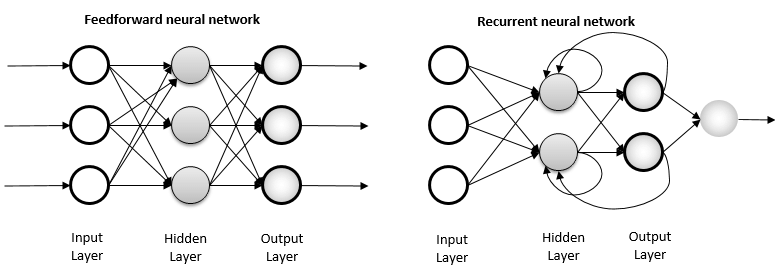

<small>출처: https://www.researchgate.net/figure/Feed-forward-and-recurrent-ANN-architecture_fig1_315111480</small>

## 순환 신경망 구조

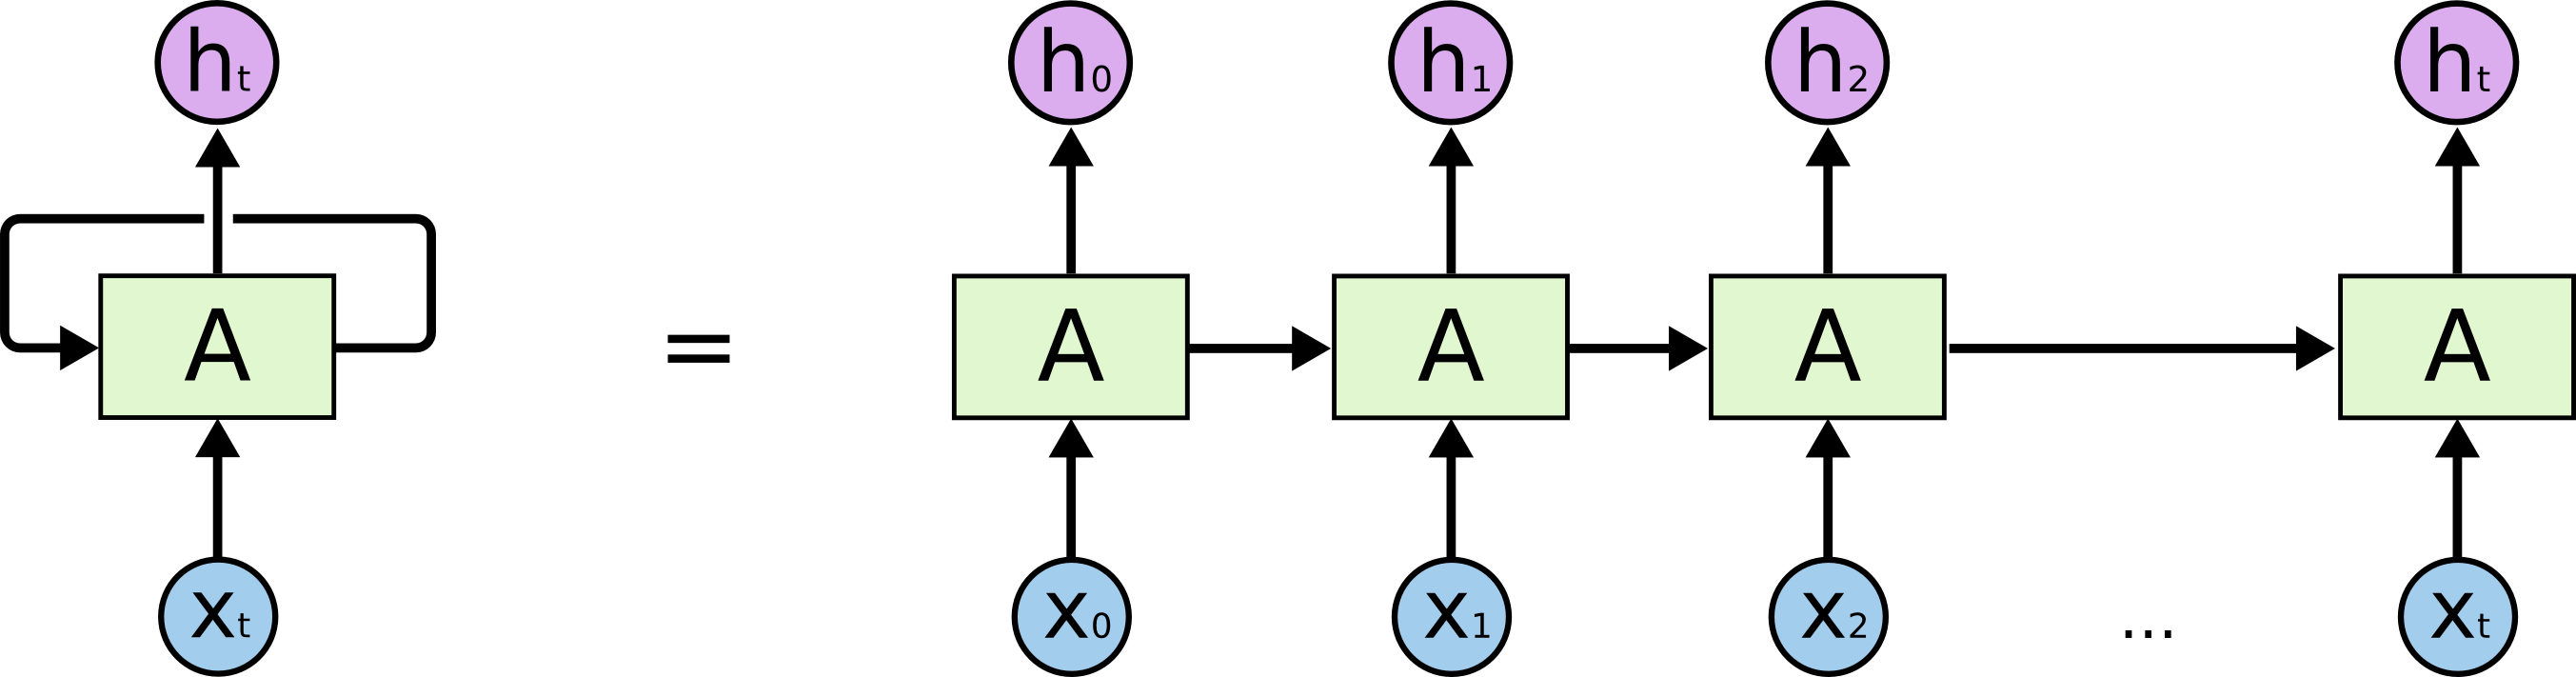

<small>https://colah.github.io/posts/2015-08-Understanding-LSTMs/</small>

- 입력 $X_t$에서 $t$는 시간을 뜻함
- 첫번째 입력인 $X_{0}$이 들어오면 첫 번째 기억 $A$가 만들어지고, 두 번째 입력인 $X_1$이 들어오면 기존 기억인 $A$를 참고하여 새로운 기억인 $A$를 생성
- 각각의 입력에 대해 출력은 해당 레이어대로 출력값을 반환

$\qquad h_t = tanh ( \ h_{t-1} W_h \ + \ x_t W_x + b) $

- $W_x$ : 입력 $X$를 출력 $h$로 변환하기 위한 가중치
- $W_h$ : 다음 시각의 출력으로 변환하기 위한 가중치
- $h$: '상태'를 기억
- $h_t \ $는 은닉 상태(hidden state) 또는 은닉 상태 벡터(hidden state vector)

## 순환 신경망의 다양한 구조

<img src="https://static.packt-cdn.com/products/9781789346640/graphics/2d4a64ef-9cf9-4b4a-9049-cb9de7a07f89.png">



<small>출처: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789346640/11/ch11lvl1sec80/introduction</small>

- 일대일(one to one)
  - 순환구조가 없는 순방향 네트워크(Feedforward Neural Network)

- 일대다(one to many)
  - 입력이 하나이고, 출력이 다수인 구조
  - 이미지 캡션(Image Captioning)

- 다대일(many to one)
  - 입력이 다수이고, 출력이 하나인 구조
  - 문장의 긍정/부정을 판단하는 감정 분석(Sentiment Classification)

- 다대다(many to many)
  - 입력과 출력이 다수인 구조
  - 하나의 언어를 다른 언어로 번역하는 기계 번역(Machine Translation)

- 동기화 다대다(many to many)
  - 입력과 출력이 다수인 구조
  - 문장에서 다음에 나올 단어를 예측하는 언어 모델(Language Model)

## `nn.RNNCell`

$ h'=tanh(W_{ih}x+b_{ih}+W_{hh}h+b_{hh}) $

<small>https://pytorch.org/docs/stable/generated/torch.nn.RNNCell.html</small>

In [22]:
import torch
import torch.nn as nn

rnn = nn.RNNCell(10,20) # input 10, output 20 인 RNN Cell 생성
input = torch.randn(6,3,10) # input
hx = torch.randn(3,20) # hidden state
output = [] # output
for i in range(5):
  hx = rnn(input[i], hx) # recurrent 구조
  output.append(hx)
  print(output[i].shape)

torch.Size([3, 20])
torch.Size([3, 20])
torch.Size([3, 20])
torch.Size([3, 20])
torch.Size([3, 20])


## `nn.RNN`

$ h_t=tanh(W_{ih}x_t+b_{ih}+W_{hh}h_{(t-1)}+b_{hh}) $

<small>https://pytorch.org/docs/stable/generated/torch.nn.RNN.html</small>

In [23]:
rnn = nn.RNN(10,20,2) # input 10, output 20 인 RNN 생성
input = torch.randn(5,3,10) # input
h0 = torch.randn(2,3,20) # hidden state
output, hn = rnn(input, h0) # input, h를 넣어서 개수만큼 반복
print(output.shape)

torch.Size([5, 3, 20])


## IMDB 데이터 로드 및 전처리

In [41]:
!pip install -U torchtext
import torchtext
from torchtext.legacy import data # 얘가 안돼요

TEXT = data.Field(tokenize = 'spacy', 
                  tokenizer_language = 'en_core_web_sm') # 일반 필드
LABEL = data.LabelField() # 긍정/부정, 레이블 필드

trainset, testset = datasets.IMDB.splits(TEXT, LABEL)

print("Train:", len(trainset))
print("Test:", len(testset))

In [ ]:
# 첫번째 자료만 확인-> 전처리 필요해 보임
print(vars(trainset[0]))

In [ ]:
# 텍스트 전처리하기
import re

# trainset 전처리
for example in trainset.examples:
  text = [x.lower() for x in vars(example)['text']] # 대소문자 제거
  text = [x.replace('<br','') for x in text] # br 제거
  text = [''.join(c for c in s if c not in string.punctuation) for s in text] # 문장부호 제거
  text = [s for s in text if s] # 공백 아닌것만 저장
  vars(example['text'] = text)

for example in test.examples:
  text = [x.lower() for x in vars(example)['text']] # 대소문자 제거
  text = [x.replace('<br','') for x in text] # br 제거
  text = [''.join(c for c in s if c not in string.punctuation) for s in text] # 문장부호 제거
  text = [s for s in text if s] # 공백 아닌것만 저장
  vars(example['text'] = text)

In [ ]:
import random
# trainset -> trainst, validset 쪼개기
trainset, validset = trainset.split(random_state = random.seed(123), split_ratio = 0.8)
print('trainset : ', len(trainset))
print('testset : ', len(testset))
print('validset : ', len(validset))

In [43]:
# vocabulary 만들기
TEXT.build_vocab(trainset,
                 max_size = 25000, # 최대 25000개의 vocab
                 min_freq = 8) # 너무 빈번하지 않은것들까지 하면 vocab 많아져 최소 8번으로 조정
LABEL.build_vocab(trainset)

print("TEXT vocabulary : ", len(TEXT.vocab))
print("LABEL vocabulary : ", len(LABEL.vocab))

In [ ]:
# 가장 많이 등장하는 top20개
print(TEXT.vocab.freqs.most_common(20))

In [ ]:
# 위 결과들 중 단어들만 가져오기(상위 20개)
print(TEXT.vocab.itos[:20])

In [ ]:
# label 값 출력
print(LABEL.vocab.stoi) # stoi -> integer 형태로 변환

In [ ]:
batch_size = 100 # 메모리가 적으면 낮춰줘야됨
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

# iterator 받아오기
train_iter, valid_iter, test_iter  = data.Bucketiterator.splits(
    (trainset, validset, testset), batch_size = batch_size, shuffle = True, devive = device)

print('train_iter : %d (%d/%d' % (len(train_iter), len(trainset, batch_size))
print('test_iter : %d (%d/%d' % (len(valid_iter), len(trainset, batch_size))
print('valid_iter : %d (%d/%d' % (len(train_iter), len(trainset, batch_size))

## RNNCell 모델

### 모델 생성

In [44]:
class RNNCell(nn.Module):
  def __init__(self, input_dim, hidden_dim):
    super(RNNCell, self).__init__()
    self.hidden_dim = hidden_dim
    self.rnn = nn.RNNCell(input_dim, hidden_dim)

  def forward(self, inputs):
    batch = inputs.shape[1]
    hx = torch.zeros((batch,self.hidden.dim)).to(device)

    for i in inputs:
      hx = self.rnn(i, hx)

    return hx

In [45]:
import torch.nn.functional as F

class RNNCellModel(nn.Module):
  def __init__(self, input_dim, embed_dim, hidden_dim, output_dim):
    super(RNNCellModel, self).__init__()
    self.em = nn.Embedding(input_dim, embed_dim) # 임베딩 레이어
    self.rnn = RNNCell(embed_dim, hidden_dim) # 위에서 만든 RNNCell 사용
    self.fc = nn.Linear(hidden_dim, output_dim) # fully connected

  def forward(self, inputs):
    out = self.em(inputs)
    out = self.rnn(out)
    out = F.relu(self.fc(out))
    return out

In [ ]:
model = RNNCellModel(input_dim=len(TEXT.vocab), 
                     embed_dim = 100,
                     hidden_dim = 256,
                     output_dim = 1)
model.to(device)

### 모델 학습 및 평가

In [ ]:
def binary_accuracy(pred, label):
  rounded_pred = torch.round(torch.sigmoid(pred)) # round를 통해 0/1로(긍정/부정) 만듦
  correct = (rounded_pred == label).float()
  acc = correct.sum()/len(correct) # 전체 개수에서 정답(1)의 비율
  return acc

In [ ]:
def train(model, optimizer, criterion, iteration):
  epoch_loss, epoch_acc = 0,0
  model.train()
  for batch in iteration:
    optimizer.zero_grad()
    text, label = batch.text, batch.label.float() # 계산할때는 label을 float 형태가 좋음
    pred = model(text).squeeze(1)
    loss = criterion(pred, label)
    acc = binary_accuracy(pred, label)
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()
    epoch_acc += acc.item()

    return epoch_loss / len(iteraiton), epoch_acc/len(iteration) # 평균 loss, 평균 acc

In [ ]:
def evaluate(model, criterion, iteration):
  epoch_loss, epoch_acc = 0,0
  model.eval()
  with torch.no_grad():
      text, label = batch.text, batch.label.float()
      pred = model(text).squeeze(1)
      loss = criterion(pred, label)
      acc = binary_accuracy(pred, label)

      epoch_loss += loss.item()
      epoch_acc += acc.item()

  return epoch_loss / len(iteration), epoch_acc/len(iteration)

In [ ]:
from torch.nn.modules.loss import BCEWithLogitsLoss
import torch.optim as optim

n_epochs = 5 # 많이 돌릴수록 좋음
optimizer = optim.SGD(model.parameters(), lr = 1e-3)
criterion = nn.BCEWithLogitsLoss().to(device) # binary crossentropy loss function

# train, valid data 돌려보기
for epoch in range(n_epochs):
  train_loss, train_acc = train(model, optimizer, criterion, iteration)
  valid_loss, valid_acc = evaluate(model, criterion, valid_iter)

  print("Epoch : %d\
          Train Loss: %.4f, Train Acc: %.4f\
          Valid Loss: %.4f, Valid Acc: %.4f"%(epoch,
                                              train_loss, train_acc,
                                              valid_loss, valid_acc)))

In [ ]:
# test data 돌려보기
test_loss, test_acc = evaluate(model, criterion, test_iter)

print("Test Loss: %.4f, Test Acc: %.4f" %(valid_loss, valid_acc))

## RNN 모델

### 모델 생성

In [47]:
class RNNModel(nn.Module):
  def __init__(self, input_dim, embed_dim, hidden_dim, output_dim):
    super(RNNModel, self).__init__()
    self.embed = nn.Embedding(input_dim, embed_dim)
    self.rnn = nn.RNN(embed_dim, hidden_dim)
    self.fc = nn.Linear(hidden_dim, output_dim)
  
  def forward(self, input):
    out = self.embed(input)
    out, hidden = self.rnn(out)
    out = self.fc(hidden.squeeze(0))
    return out

In [ ]:
model = RNNModel(input_dim = len(TEXT.vocab),
                 embed_dim = 128,
                 hidden_dim = 256,
                 output_dim = 1)
model.to(device)

### 모델 학습 및 평가

In [ ]:
def train(model, optimizer, criterion, iteration):
  epoch_loss, epoch_acc = 0,0
  model.train()
  for batch in iteration:
    optimizer.zero_grad()
    text, label = batch.text, batch.label.float() # 계산할때는 label을 float 형태가 좋음
    pred = model(text).squeeze(1)
    loss = criterion(pred, label)
    acc = binary_accuracy(pred, label)
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()
    epoch_acc += acc.item()

    return epoch_loss / len(iteraiton), epoch_acc/len(iteration) # 평균 loss, 평균 acc

In [ ]:
def evaluate(model, criterion, iteration):
  epoch_loss, epoch_acc = 0,0
  model.eval()
  with torch.no_grad():
     text, label = batch.text, batch.label.float()
      pred = model(text).squeeze(1)
      loss = criterion(pred, label)
      acc = binary_accuracy(pred, label)

      epoch_loss += loss.item()
      epoch_acc += acc.item()

  return epoch_loss / len(iteration), epoch_acc/len(iteration)

In [ ]:
from torch.nn.modules.loss import BCEWithLogitsLoss
import torch.optim as optim

n_epochs = 5 # 많이 돌릴수록 좋음
optimizer = optim.SGD(model.parameters(), lr = 1e-3)
criterion = nn.BCEWithLogitsLoss().to(device) # binary crossentropy loss function

# train, valid data 돌려보기
for epoch in range(n_epochs):
  train_loss, train_acc = train(model, optimizer, criterion, iteration)
  valid_loss, valid_acc = evaluate(model, criterion, valid_iter)

  print("Epoch : %d\
          Train Loss: %.4f, Train Acc: %.4f\
          Valid Loss: %.4f, Valid Acc: %.4f"%(epoch,
                                              train_loss, train_acc,
                                              valid_loss, valid_acc)))

In [ ]:
# test data 돌려보기
test_loss, test_acc = evaluate(model, criterion, test_iter)

print("Test Loss: %.4f, Test Acc: %.4f" %(valid_loss, valid_acc))

# LSTM(Long Short-Term Memory)

- 장단기 메모리 알고리즘
- 기존 RNN은 장기 의존성(Long-Term Dependency) 문제 발생
- RNN이 가중치가 업데이트되는 과정에서 기울기가 1보다 작은 값이 계속 곱해지기 때문에 소멸되는 문제 발생
- 기울기 소멸 문제를 해결하기 위해 망각 게이트(forget gate), 입력 게이트(input gate), 출력 게이트(output gate)를 은닉층의 각 뉴런에 추가

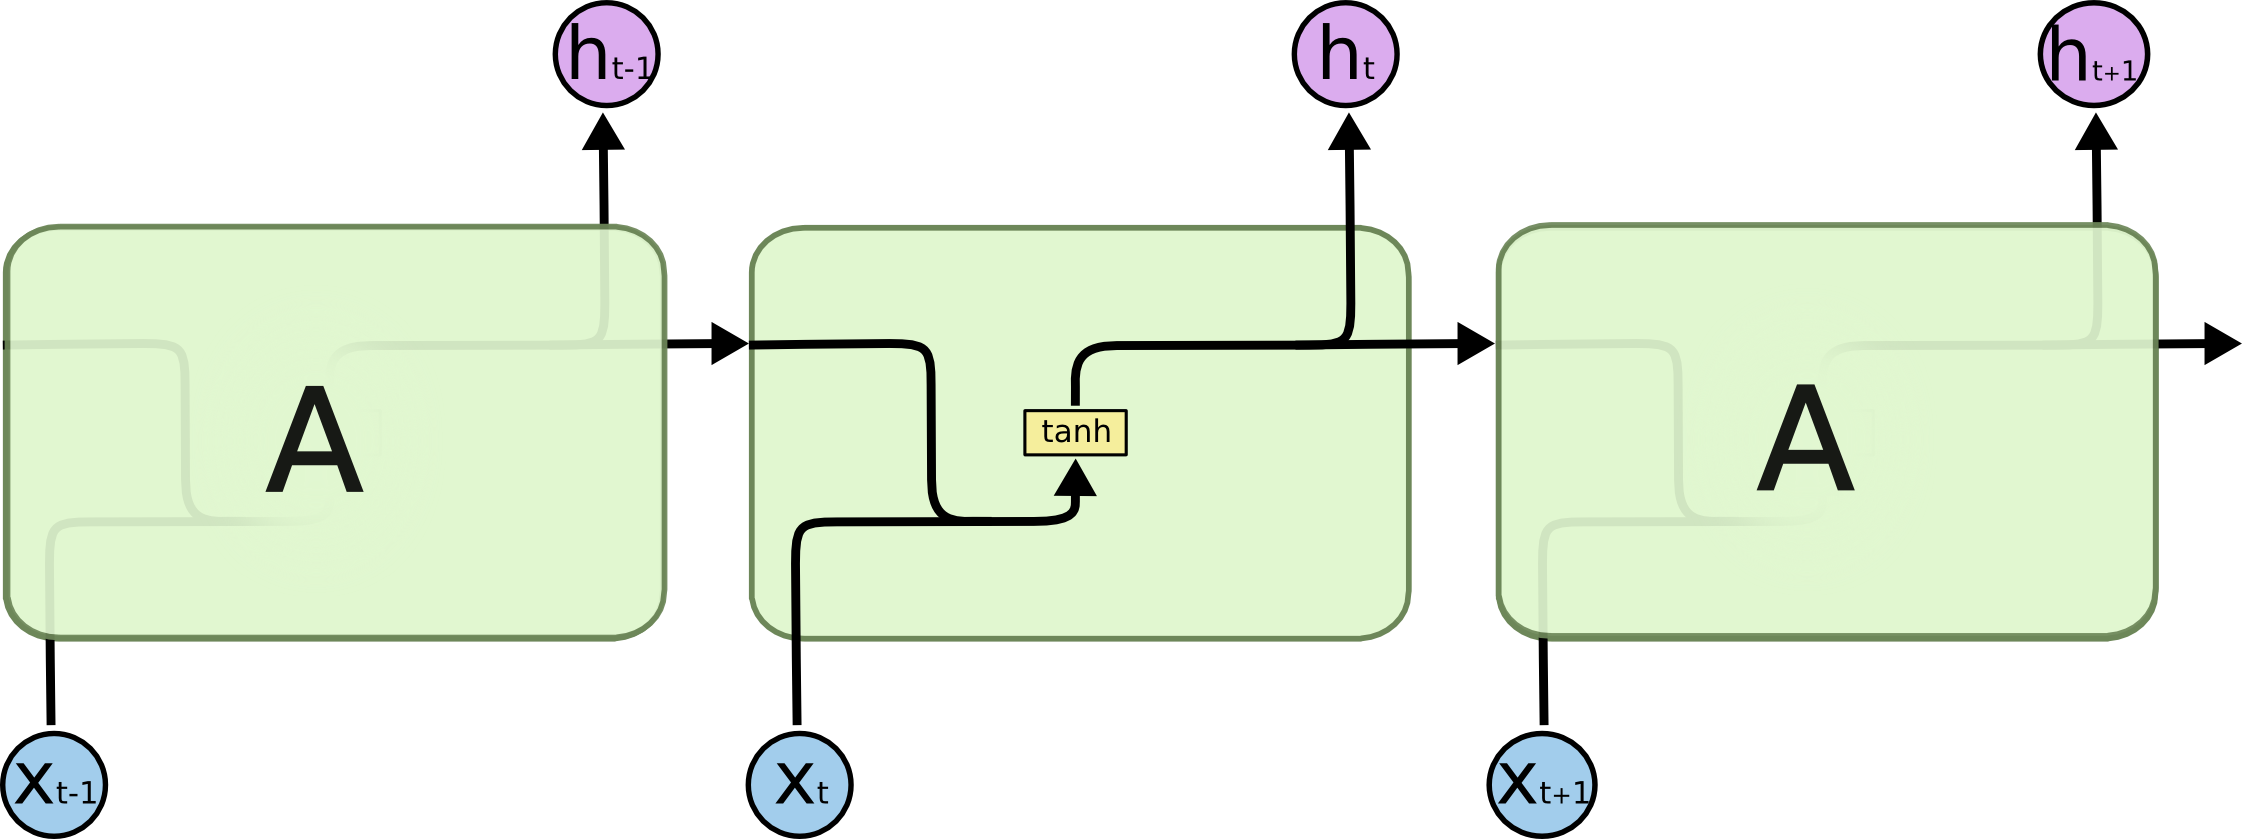

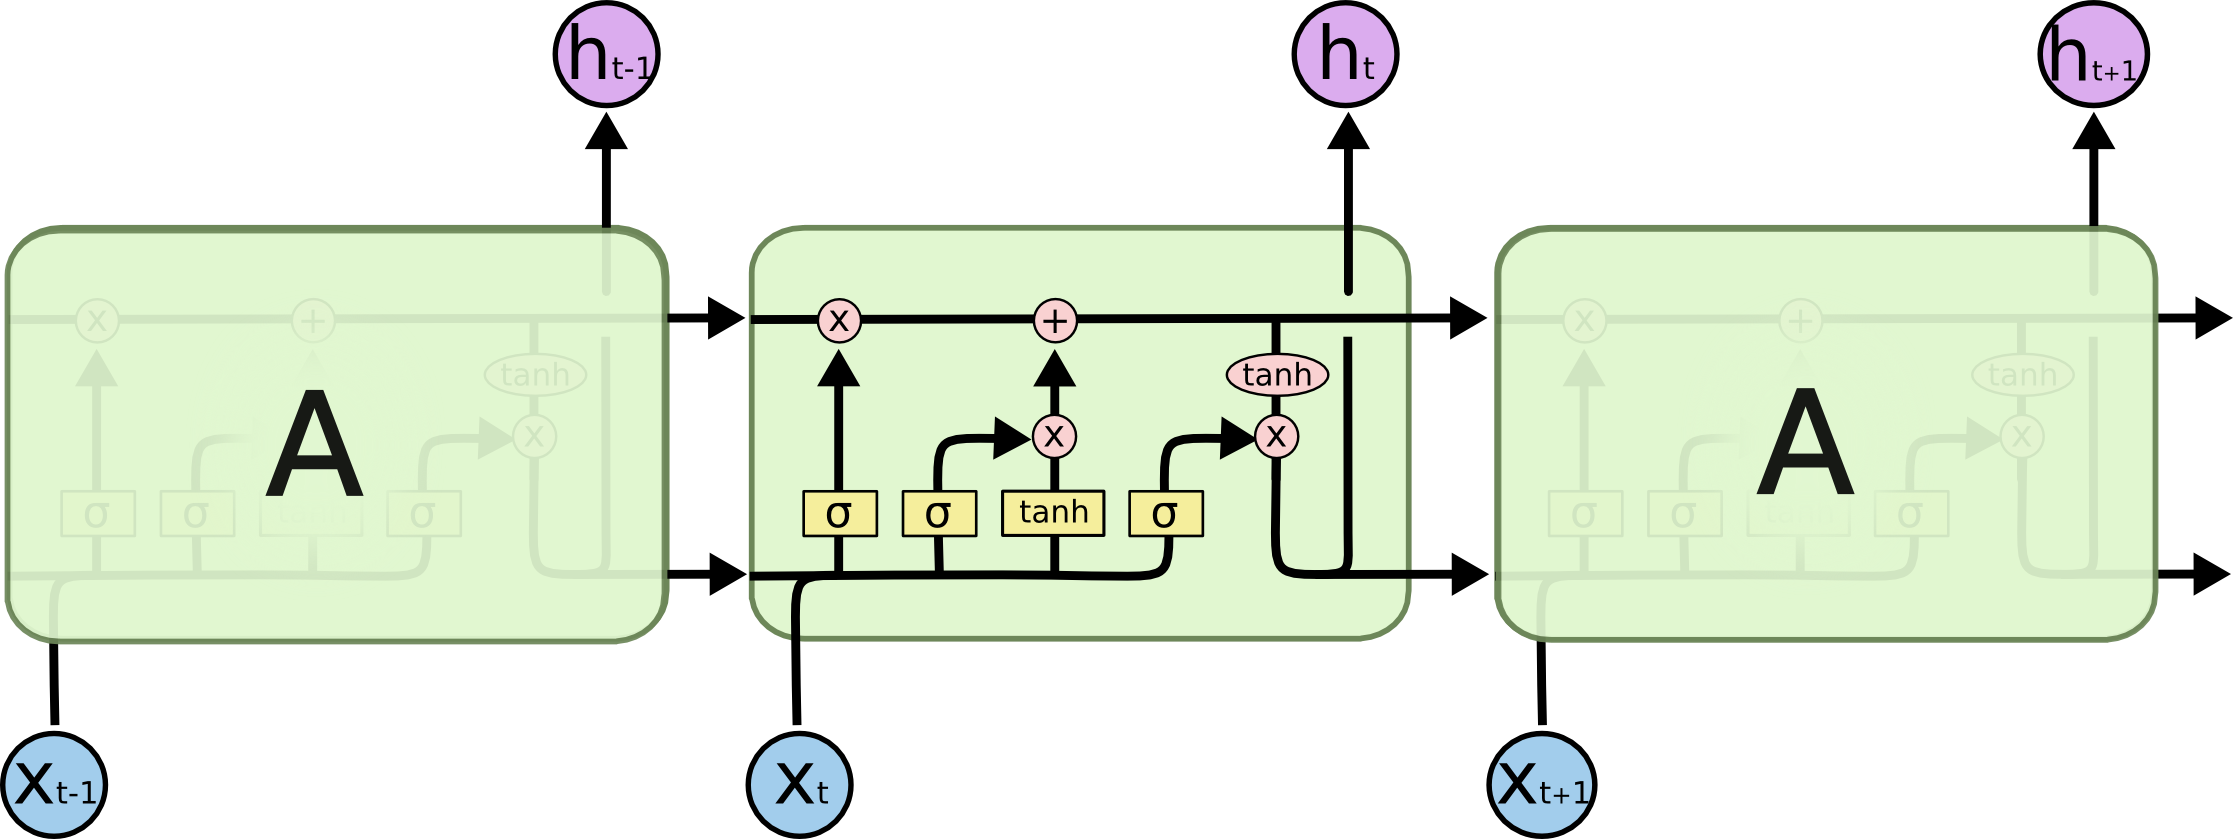

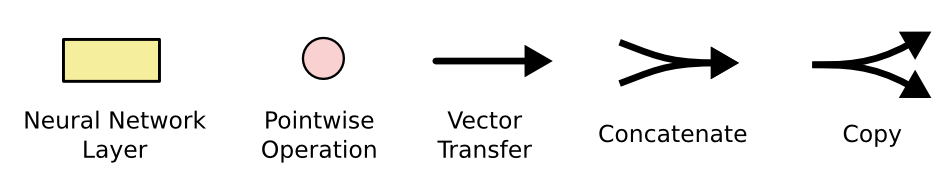

## 망각 게이트(forget gate)

- $f_t$: 과거 정보를 어느정도 망각할지 결정
- 과거 정보를 입력받아 $ \sigma $ 계산으로 0~1 사이의 값을 받고, 그 값을 과거 정보에 곱함
- 0에 가까울수록 과거 정보를 잊고, 1에 가까울수록 과거 정보를 기억


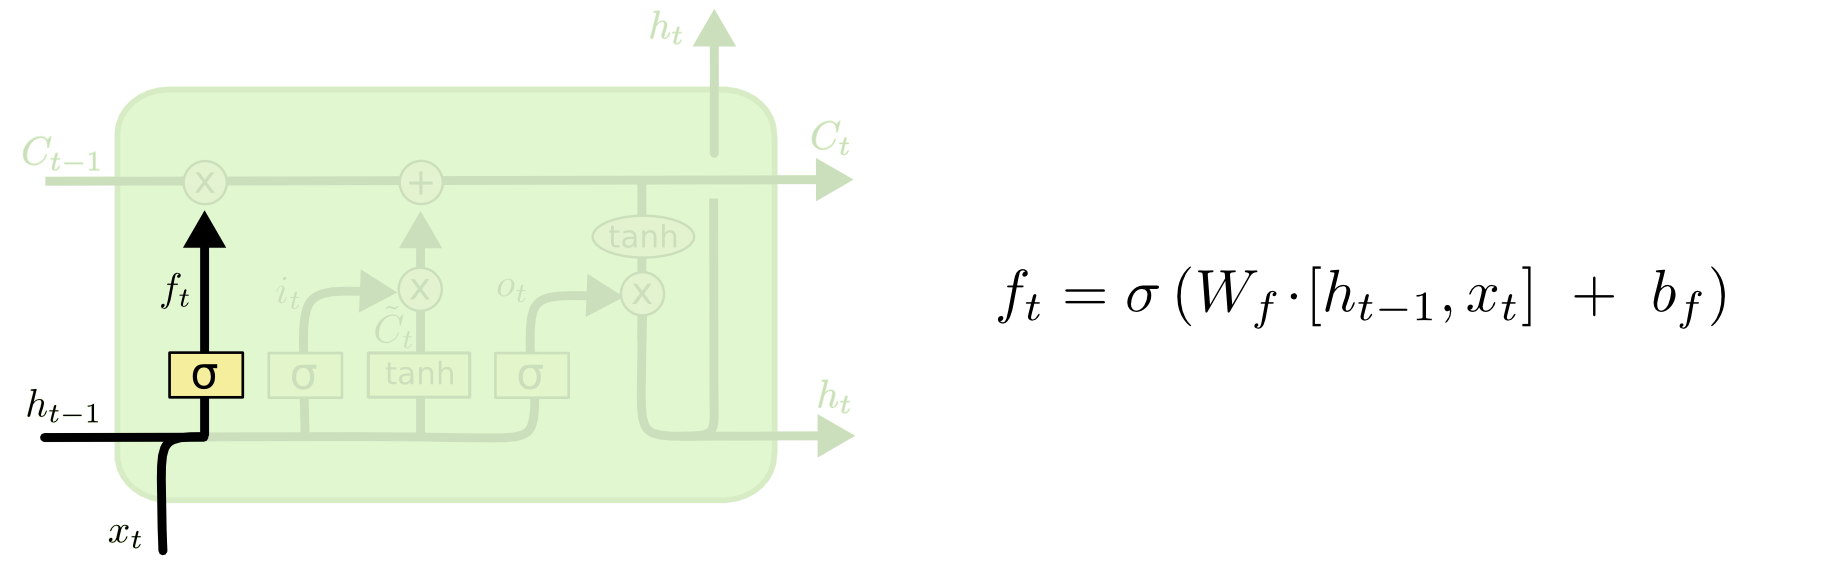

## 입력 게이트(input gate)

- $i_t$: 현재 정보를 어느정도 저장할지 결정
- 신규 정보를 입력받아 $ \sigma $ 계산으로 0~1 사이의 값을 받고, 그 값을 현재 정보에 곱함
- 0에 가까울수록 현재 정보를 잊고, 1에 가까울수록 현재 정보를 기억
- $\tilde{C}_t$: tanh()를 통해서 -1~1 사이의 값을 받음
- -1에 가까울수록 현재 정보를 최소한으로 더하고, 1에 가까울수록 현재 정보를 최대한으로 더함

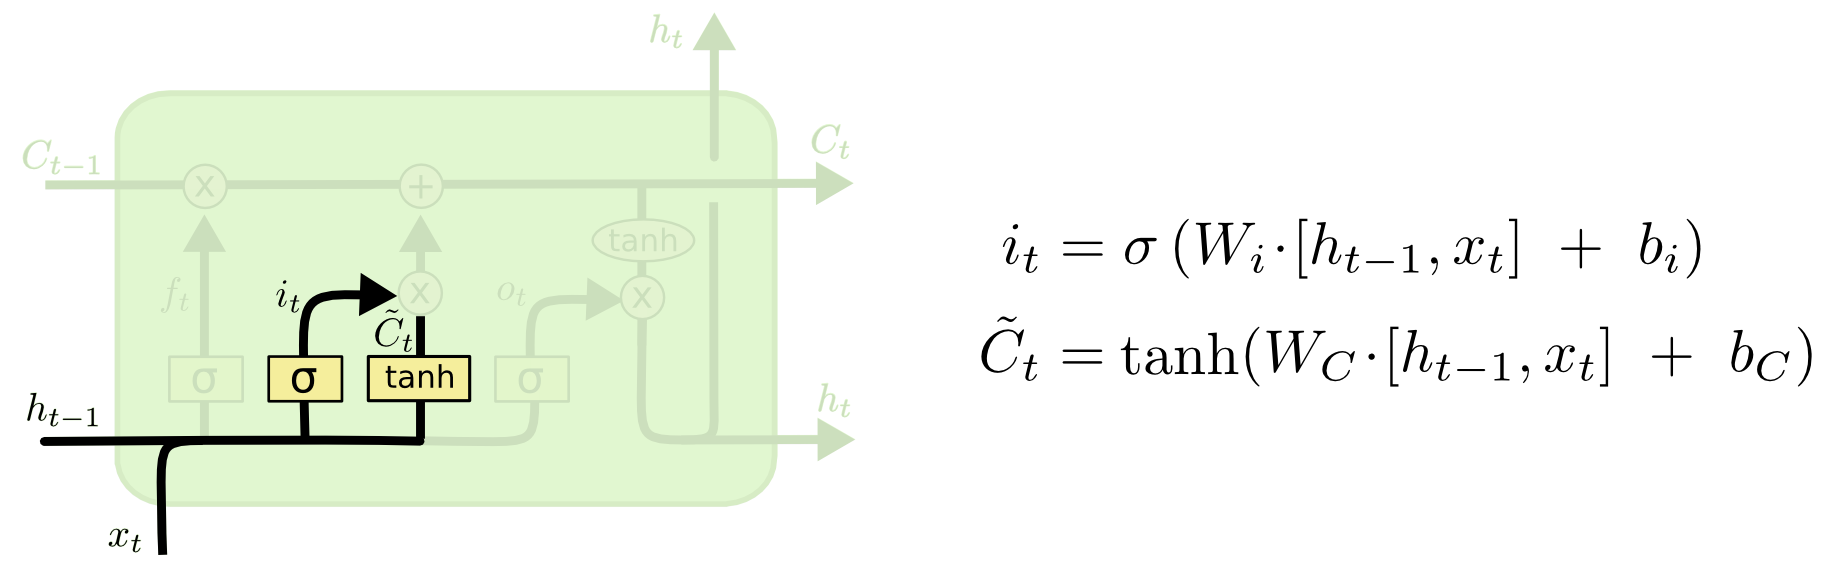

## 갱신 게이트(update gate)

- 과거의 cell state인 $C_{t-1}$를 새로운 cell state인 $C_t$로 업데이트
- 과거 정보를 위한 $f_t$와 현재 정보를 위한 $i_t$와 $\tilde{C}_t$를 구한 후 원소곱
- $f_t*C_{t-1}$을 통해 과거의 cell state를 얼마나 유지할지 계산
- $i_t*\tilde{C}_t$를 통해 현재 기억할 정보를 계산
- $f_t*C_{t-1}$와 $i_t*\tilde{C}_t$ 두 값을 더하여 $C_t$ 값 업데이트

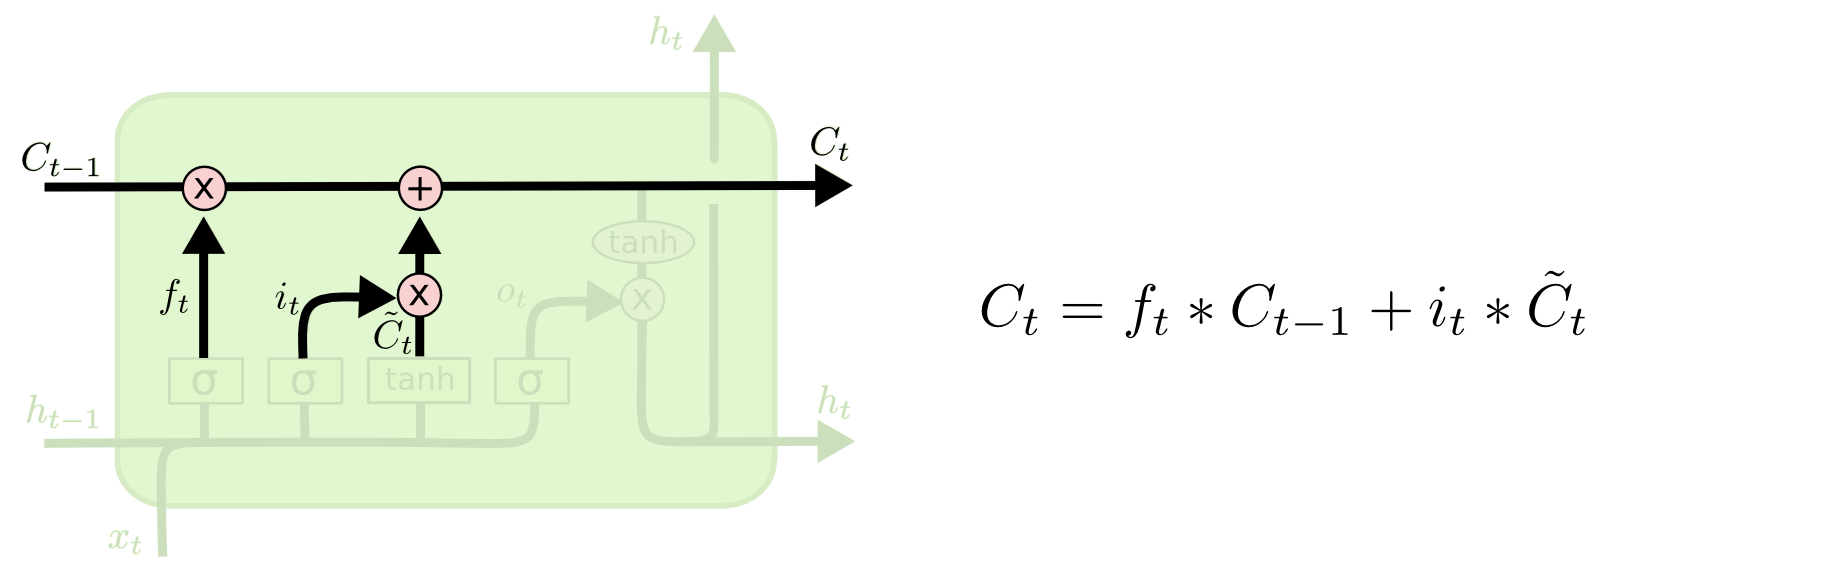

## 출력 게이트(output gate)

- $o_t$는 현재 cell state를 얼마나 $h_t$로 출력할지 결정
- $o_t$에서 현재 cell state인 $C_t$를 tanh()를 통해 나온 값을 곱하여 $h_t$로 출력

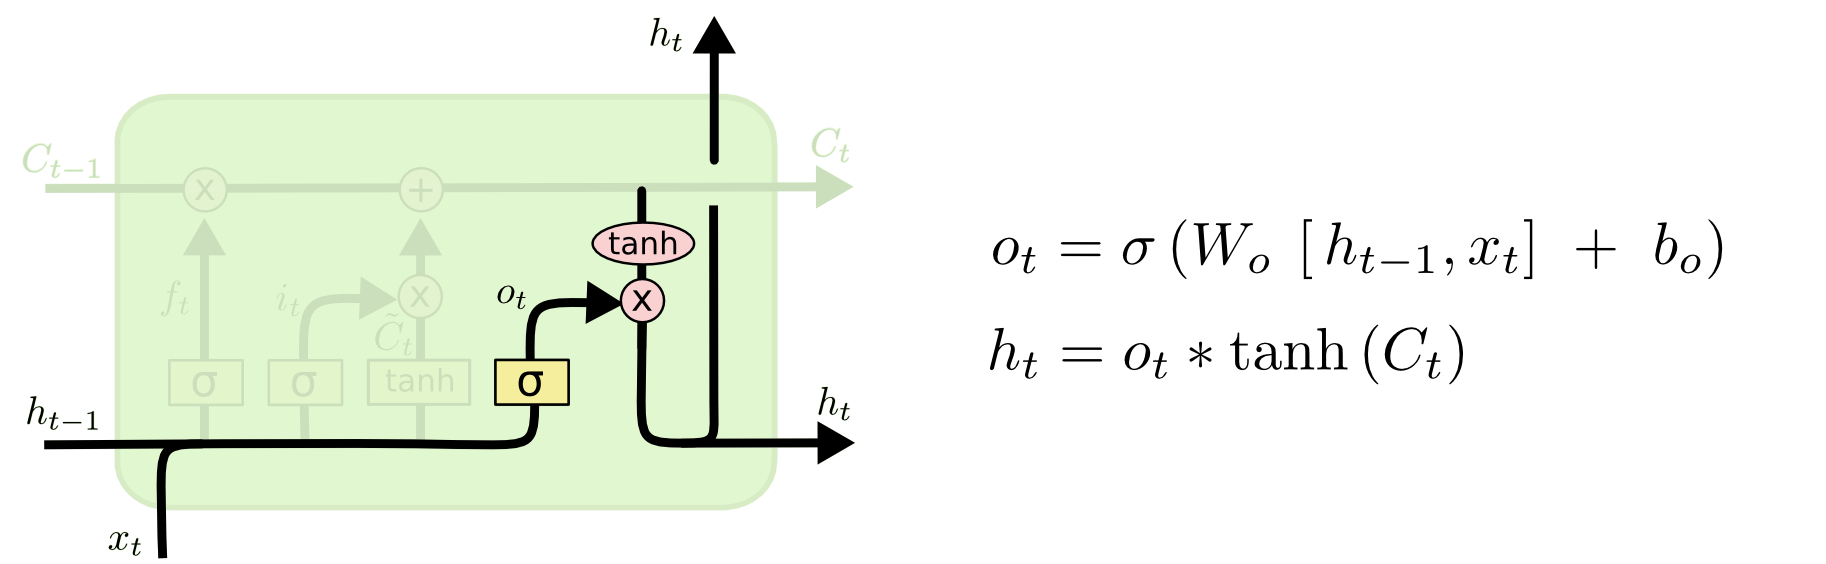

<small>https://colah.github.io/posts/2015-08-Understanding-LSTMs/</small>

## `nn.LSTMCell`

$ i=\sigma(W_{ii}x+b_{ii}+W_{hi}h+b_{hi}) $

$ f=\sigma(W_{if}x+b_{if}+W_{hf}h+b_{hf}) $

$ g=tanh(W_{ig}x+b_{ig}+W_{hg}h+b_{hg}) $

$ o=\sigma(W_{io}x+b_{io}+W_{ho}h+b_{ho}) $

$ c'=f*c+i*g $

$ h'=o * tanh(c') $

<small>https://pytorch.org/docs/stable/generated/torch.nn.LSTMCell.html</small>

In [1]:
,....

SyntaxError: ignored

## `nn.LSTM`

$ i_t=\sigma(W_{ii}x_t+b_{ii}+W_{hi}h_{t-1}+b_{hi}) $

$ f_t=\sigma(W_{if}x_t+b_{if}+W_{hf}h_{t-1}+b_{hf}) $

$ g_t=tanh(W_{ig}x_t+b_{ig}+W_{hg}h_{t-1}+b_{hg}) $

$ o_t=\sigma(W_{io}x_t+b_{io}+W_{ho}h_{t-1}+b_{ho}) $

$ c_t=f_t \odot c_{t-1}+i_t \odot g_t $

$ h_t=o_t \odot tanh(c_t) $

<small>https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html</small>


## LSTMCell 모델

### 모델 생성

### 모델 학습 및 평가

## LSTM 모델

### 모델 생성

### 모델 학습 및 평가

# GRU (Gated Recurrent Unit)

- LSTM에서 forget gate와 input gate를 합쳐서 더 단순하게 만든 구조
- 기억 셀은 없고, 시간방향으로 전파하는 것은 은닉 상태만 있음

## 리셋 게이트(reset gate)

- 과거의 은닉 상태를 얼마나 무시할지 결정: $r_t=\sigma(W_r \cdot [h_{t-1}, x_t]) $

## 갱신 게이트(update gate)

- 은닉 상태를 갱신하는 게이트로서 LSTM의 forget, input gate 역할을 동시에 함
- 현재 입력 정보를 얼마나 사용할지 반영: $z_t=\sigma(W_z \cdot [h_{t-1}, x_t]) $
- 과거 정보를 얼마나 사용할지 반영한 하고 최종 hidden state(출력값) 계산
$\tilde h_t=tanh(W \cdot [r_t * h_{t-1}, x_t]) $
$h_t=(1-z_t) * h_{t-1}+z_t * \tilde h_t $

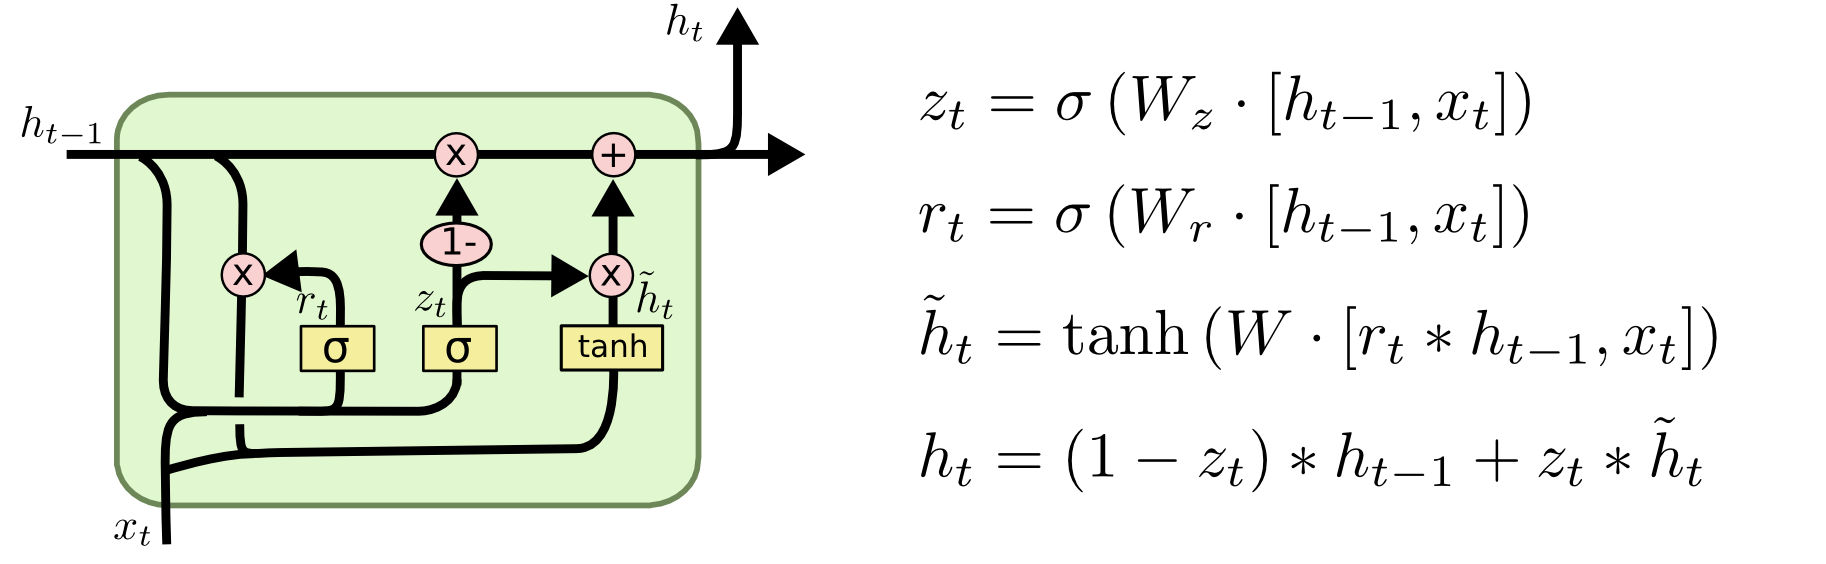

<small>https://colah.github.io/posts/2015-08-Understanding-LSTMs/</small>

## `nn.GRUCell`

$ r=\sigma(W_{ir}x+b_{ir}+W_{hr}h+b_{hr}) $

$ z=\sigma(W_{iz}x+b_{iz}+W_{hz}h+b_{hz}) $

$ n=tanh(W_{in}x+b_{in}+r*(W_{hn}h+b_{hn})) $

$ h'=(1-z)*n+z*h $

<small>https://pytorch.org/docs/stable/generated/torch.nn.GRUCell.html</small>

## `nn.GRU`

$ r_t=\sigma(W_{ir}x_t+b_{ir}+W_{hr}h_{t-1}+b_{hr}) $

$ z_t=\sigma(W_{iz}x_t+b_{iz}+W_{hz}h_{t-1}+b_{hz}) $

$ n_t=tanh(W_{in}x_t+b_{in}+r_t*(W_{hn}h_{t-1}+b_{hn})) $

$ h_t=(1-z_t)*n_t + z_t*h_{(t-1)} $

<small>https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html</small>


## GRUCell 모델

### 모델 생성

### 모델 학습 및 평가

## GRU 모델

### 모델 생성

### 모델 학습 및 평가